In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
 #importing warnings
import warnings
warnings.filterwarnings('ignore')


In [5]:
df=pd.read_csv('Agriculture_data.csv')
df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [6]:
df.tail()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
88853,F00155935,3337,1,0,2,10,12.0,44,3,0
88854,F00155938,3516,1,0,2,10,20.0,38,1,0
88855,F00155939,3516,1,0,2,15,40.0,8,2,0
88856,F00155942,3702,1,0,2,10,25.0,18,3,0
88857,F00155945,3895,1,0,2,20,37.0,7,3,0


In [7]:
df.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [8]:
df.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

In [9]:
df.shape

(88858, 10)

In [10]:
df.isnull().any()

ID                         False
Estimated_Insects_Count    False
Crop_Type                  False
Soil_Type                  False
Pesticide_Use_Category     False
Number_Doses_Week          False
Number_Weeks_Used           True
Number_Weeks_Quit          False
Season                     False
Crop_Damage                False
dtype: bool

In [11]:
df.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

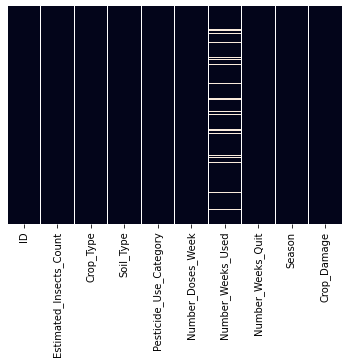

In [12]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [13]:
df['Number_Weeks_Used'] .fillna(df['Number_Weeks_Used'].mode()[0],inplace=True)

In [14]:
df.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       88858 non-null  object 
 1   Estimated_Insects_Count  88858 non-null  int64  
 2   Crop_Type                88858 non-null  int64  
 3   Soil_Type                88858 non-null  int64  
 4   Pesticide_Use_Category   88858 non-null  int64  
 5   Number_Doses_Week        88858 non-null  int64  
 6   Number_Weeks_Used        88858 non-null  float64
 7   Number_Weeks_Quit        88858 non-null  int64  
 8   Season                   88858 non-null  int64  
 9   Crop_Damage              88858 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 6.8+ MB


In [16]:
cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

['ID']

In [17]:
df=df.drop(columns=['ID'],axis=1)

In [18]:
int_col=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='int64':
        int_col.append(x)
int_col        

['Estimated_Insects_Count',
 'Crop_Type',
 'Soil_Type',
 'Pesticide_Use_Category',
 'Number_Doses_Week',
 'Number_Weeks_Quit',
 'Season',
 'Crop_Damage']

In [19]:
df=pd.DataFrame(df)

# To check the correlation

In [20]:
df_cor=df.corr()
df_cor

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
Estimated_Insects_Count,1.000000,-0.088830,-0.056375,-0.079904,-0.102461,0.404464,0.299279,0.002304,0.202888
Crop_Type,-0.088830,1.000000,-0.287372,0.235779,-0.192161,-0.041473,-0.233394,0.002161,-0.016495
Soil_Type,-0.056375,-0.287372,1.000000,0.032657,0.079447,-0.063444,0.009364,0.002327,-0.021997
Pesticide_Use_Category,-0.079904,0.235779,0.032657,1.000000,-0.003498,0.319399,-0.554169,0.002811,0.175002
Number_Doses_Week,-0.102461,-0.192161,0.079447,-0.003498,1.000000,0.116879,-0.037131,-0.001401,-0.030874
Number_Weeks_Used,0.404464,-0.041473,-0.063444,0.319399,0.116879,1.000000,-0.415646,0.003614,0.213591
Number_Weeks_Quit,0.299279,-0.233394,0.009364,-0.554169,-0.037131,-0.415646,1.000000,0.000595,-0.133117
Season,0.002304,0.002161,0.002327,0.002811,-0.001401,0.003614,0.000595,1.000000,-0.000184
Crop_Damage,0.202888,-0.016495,-0.021997,0.175002,-0.030874,0.213591,-0.133117,-0.000184,1.000000


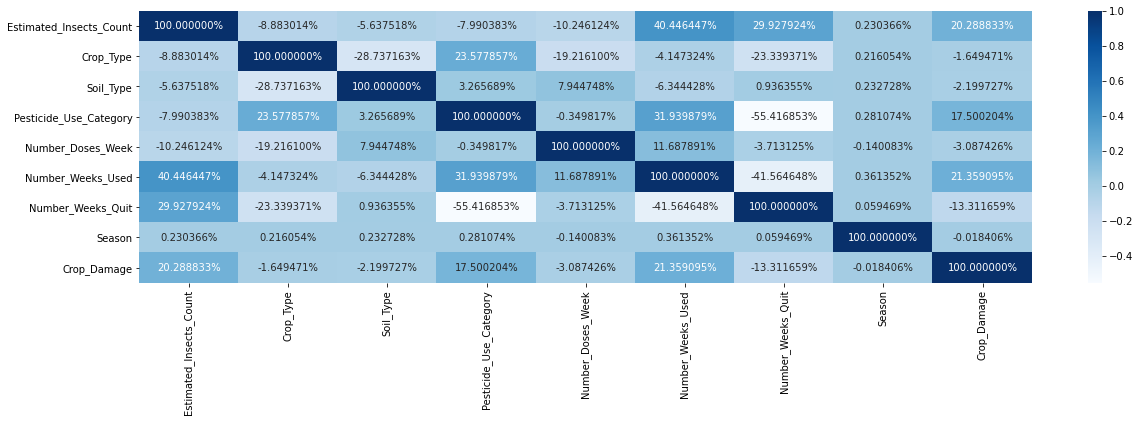

In [21]:
plt.figure(figsize=(20,5))
sns.heatmap(df_cor,annot=True,fmt='0%',cmap='Blues')

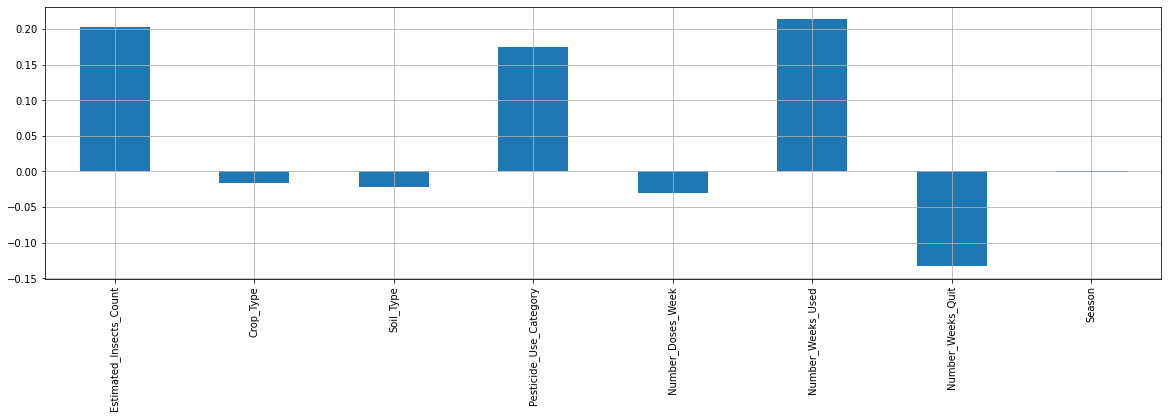

In [22]:
plt.figure(figsize=(20,5))
df.drop('Crop_Damage',axis=1).corrwith(df['Crop_Damage']).plot(kind='bar',grid=True)
plt.show()

In [23]:
df.describe()


,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000
mean,1399.012210,0.284375,0.458417,2.264186,25.849952,27.750490,9.589986,1.896959,0.190562
std,849.048781,0.451119,0.498271,0.461772,15.554428,12.032261,9.900631,0.701322,0.454215
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,26.000000,7.000000,2.000000,0.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,36.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


# Visualization

In [24]:
df.Crop_Damage.value_counts()

0    74238
1    12307
2     2313
Name: Crop_Damage, dtype: int64

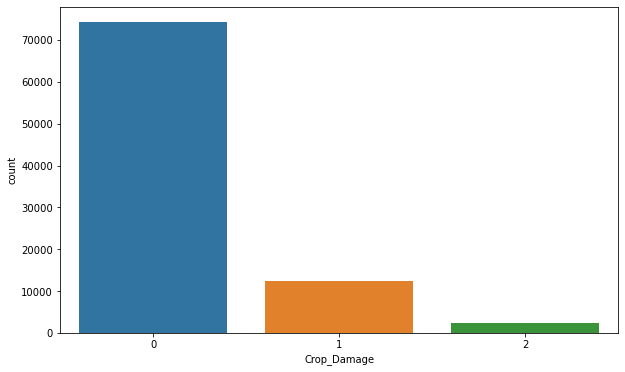

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(x='Crop_Damage',data=df)

In [26]:
crop_alive=len(df[df.Crop_Damage==0])
dam_other=len(df[df.Crop_Damage==1])
dam_pest=len(df[df.Crop_Damage==2])
print ("Percentage of Crop alive:",crop_alive/len(df.Crop_Damage)*100,'%')
print ("Percentage of Crops damage due to other reasons:",dam_other/len(df.Crop_Damage)*100,'%')
print ("Percentage of Crops damage due to Pesticides:",dam_pest/len(df.Crop_Damage)*100,'%')

Percentage of Crop alive: 83.54678250692116 %
Percentage of Crops damage due to other reasons: 13.850187940309258 %
Percentage of Crops damage due to Pesticides: 2.6030295527695877 %


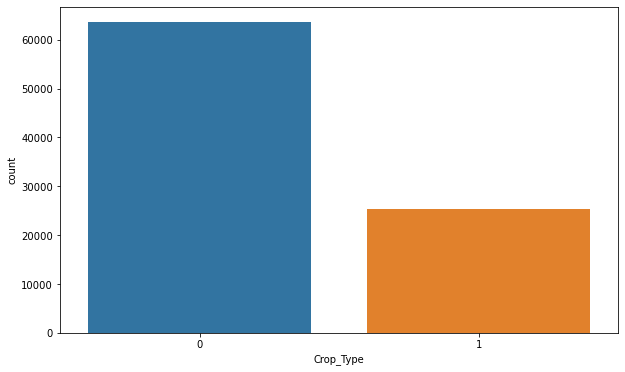

In [27]:
plt.figure(figsize=(10,6))
sns.countplot(x='Crop_Type',data=df)

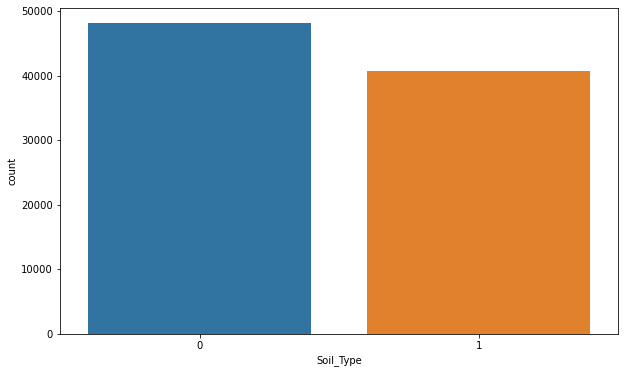

In [28]:
plt.figure(figsize=(10,6))
sns.countplot(x='Soil_Type',data=df)

Text(0.5, 0, 'Pesticide :-- 1 = Never ,  2 = Priviously Used ,  3=Currently Using')

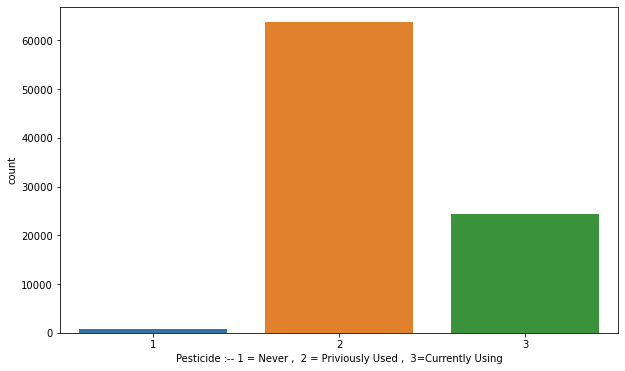

In [29]:
plt.figure(figsize=(10,6))
sns.countplot(x='Pesticide_Use_Category',data=df)
plt.xlabel('Pesticide :-- 1 = Never ,  2 = Priviously Used ,  3=Currently Using')

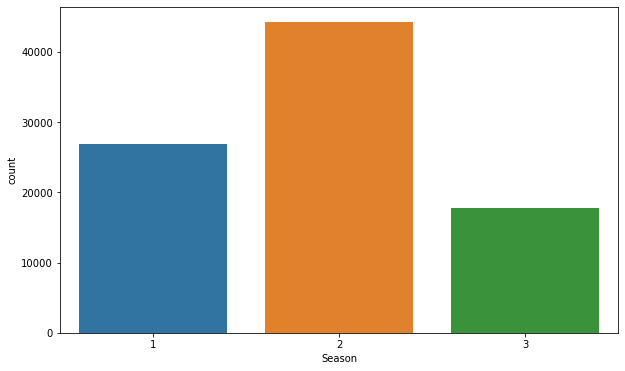

In [30]:
plt.figure(figsize=(10,6))
sns.countplot(x='Season',data=df)

(array([ 6357., 20289., 27479., 12270., 13234.,  3638.,  4431.,   364.,
          683.,   113.]),
 array([ 0. ,  9.5, 19. , 28.5, 38. , 47.5, 57. , 66.5, 76. , 85.5, 95. ]),
 <a list of 10 Patch objects>)

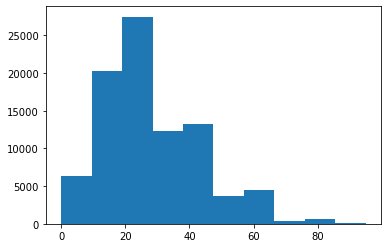

In [31]:
plt.hist(df['Number_Doses_Week'])

(array([ 1683.,  6627., 24249., 13610., 15155., 13487.,  6921.,  4991.,
         1850.,   285.]),
 array([ 0. ,  6.7, 13.4, 20.1, 26.8, 33.5, 40.2, 46.9, 53.6, 60.3, 67. ]),
 <a list of 10 Patch objects>)

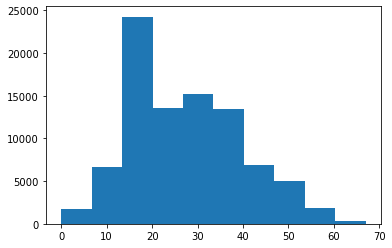

In [32]:
 plt.hist(df['Number_Weeks_Used'])

(array([37743., 12024., 12779., 10665.,  7279.,  4350.,  2501.,  1041.,
          383.,    93.]),
 array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50.]),
 <a list of 10 Patch objects>)

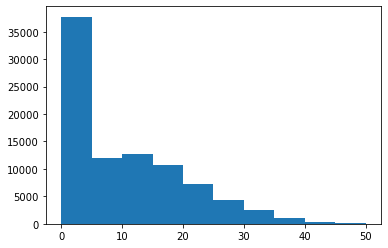

In [33]:
plt.hist(df['Number_Weeks_Quit'])

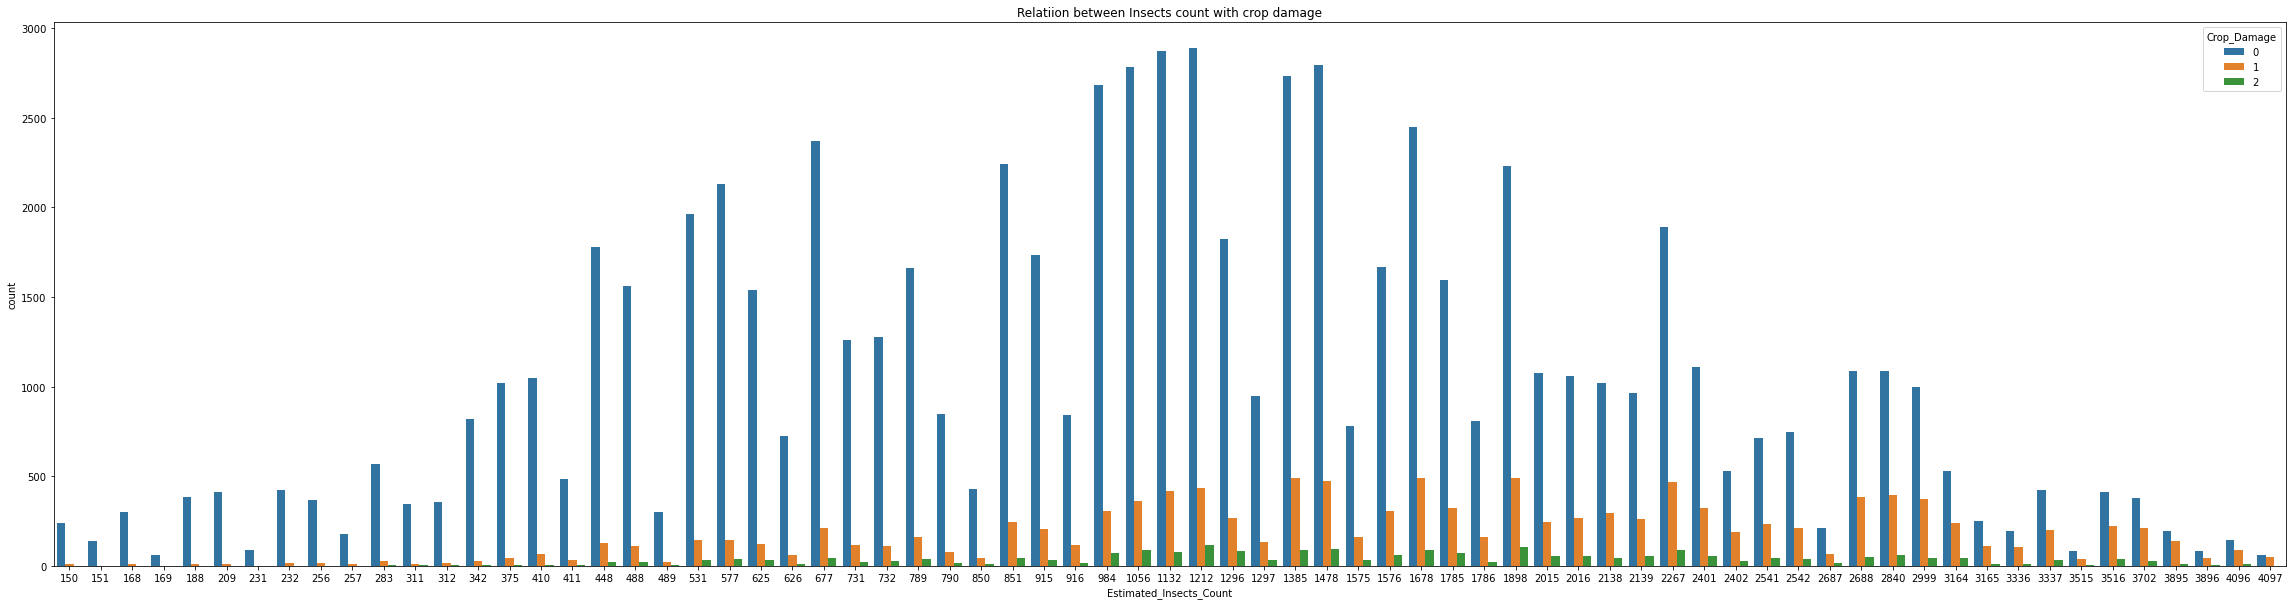

In [34]:
plt.figure(figsize=(40,10))
sns.countplot(x='Estimated_Insects_Count',hue='Crop_Damage',data=df)
plt.title('Relatiion between Insects count with crop damage')
plt.show()

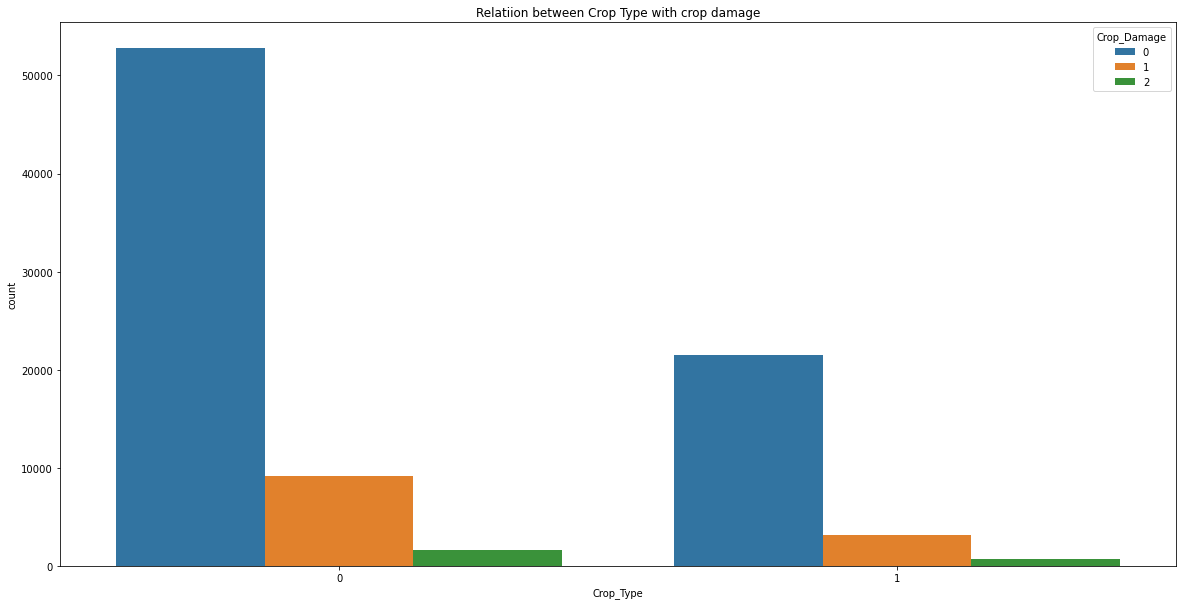

In [35]:
plt.figure(figsize=(20,10))
sns.countplot(x='Crop_Type',hue='Crop_Damage',data=df)
plt.title('Relatiion between Crop Type with crop damage')
plt.show()

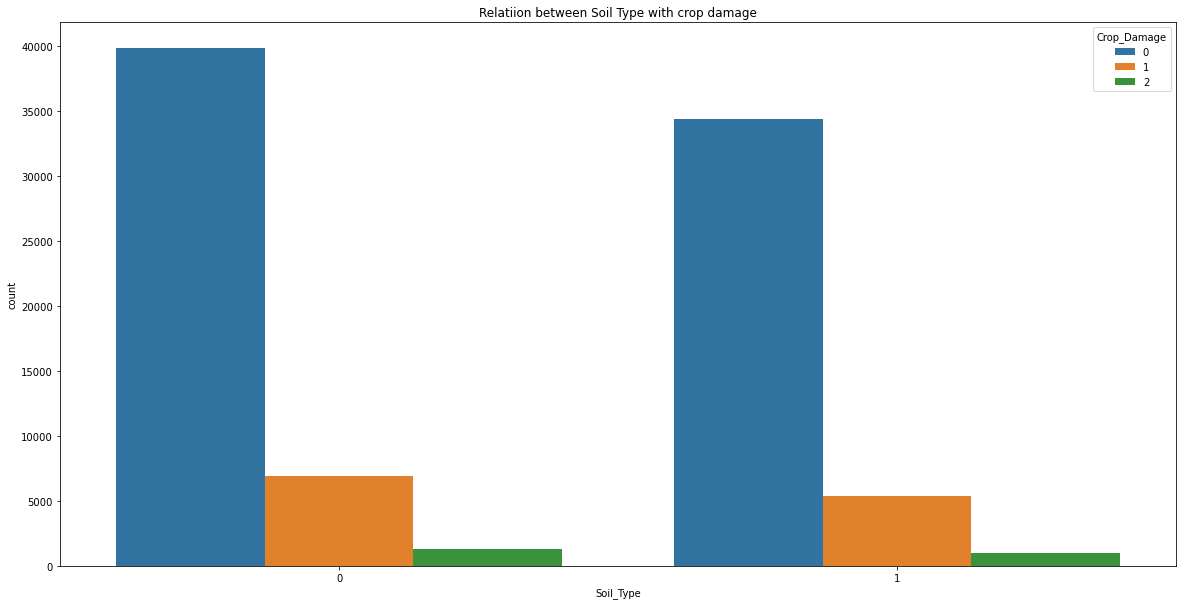

In [36]:
plt.figure(figsize=(20,10))
sns.countplot(x='Soil_Type',hue='Crop_Damage',data=df)
plt.title('Relatiion between Soil Type with crop damage')
plt.show()

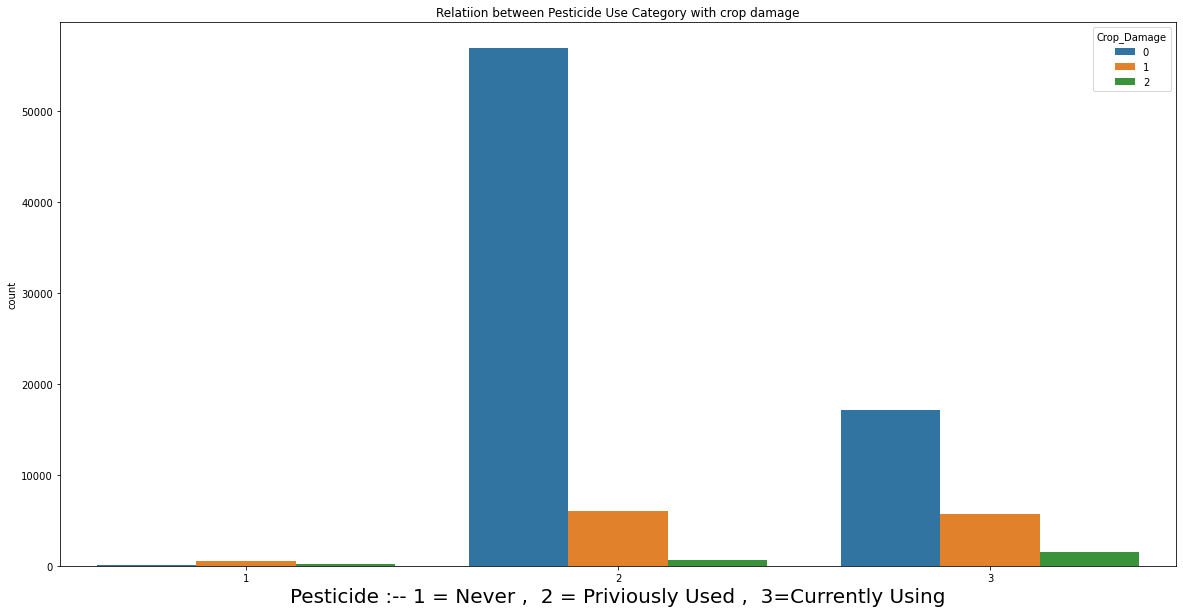

In [37]:
plt.figure(figsize=(20,10))
sns.countplot(x='Pesticide_Use_Category',hue='Crop_Damage',data=df)
plt.title('Relatiion between Pesticide Use Category with crop damage')
plt.xlabel('Pesticide :-- 1 = Never ,  2 = Priviously Used ,  3=Currently Using',size=20)
plt.show()



<Figure size 1440x720 with 0 Axes>

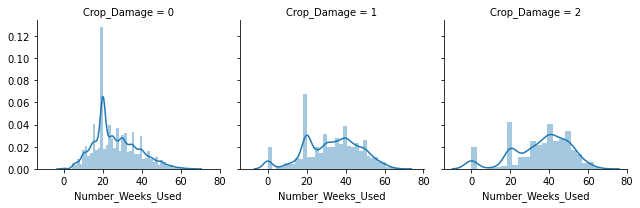

In [38]:
plt.figure(figsize=(20,10))
facet=sns.FacetGrid(df,col='Crop_Damage')
facet.map(sns.distplot,'Number_Weeks_Used')
plt.show()

<Figure size 1440x720 with 0 Axes>

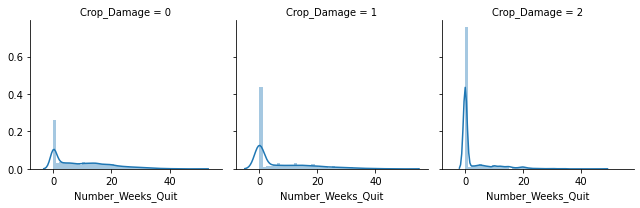

In [39]:
plt.figure(figsize=(20,10))
facet=sns.FacetGrid(df,col='Crop_Damage')
facet.map(sns.distplot,'Number_Weeks_Quit')
plt.show()

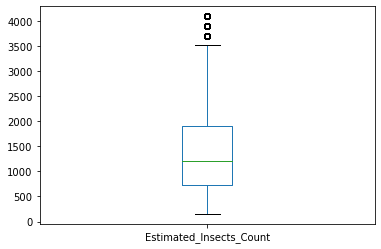

In [40]:
#columns=['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type', 'Number_Doses_Week', 'Number_Weeks_Used','Number_Weeks_Quit'])
df['Estimated_Insects_Count'].plot.box()

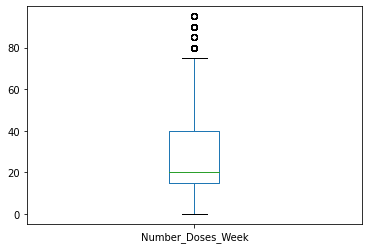

In [41]:
df['Number_Doses_Week'].plot.box()

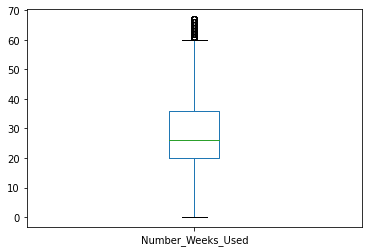

In [42]:
df['Number_Weeks_Used'].plot.box()

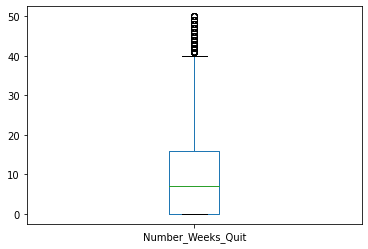

In [43]:
df['Number_Weeks_Quit'].plot.box()

# checking Skewness

In [44]:
df.skew()

Estimated_Insects_Count    0.839146
Crop_Type                  0.955978
Soil_Type                  0.166914
Pesticide_Use_Category     0.779488
Number_Doses_Week          0.962879
Number_Weeks_Used          0.421001
Number_Weeks_Quit          0.892773
Season                     0.145228
Crop_Damage                2.367816
dtype: float64

In [45]:
df.skew().index

Index(['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [46]:
#treating skewness via Square root & cube root method
df.skew()
for col in df.skew().index:
    if col in df.describe().columns:
        if df[col].skew()>0.55:
            df[col]=np.sqrt(df[col])
        if df[col].skew()<-0.55:
            df[col]=np.cbrt(df[col])

In [47]:
df.skew()

Estimated_Insects_Count    0.233920
Crop_Type                  0.955978
Soil_Type                  0.166914
Pesticide_Use_Category     0.589801
Number_Doses_Week          0.057880
Number_Weeks_Used          0.421001
Number_Weeks_Quit          0.015768
Season                     0.145228
Crop_Damage                1.919987
dtype: float64

# Removing outliers

In [48]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for column in df.columns:
    if df[column].dtype==np.number:
        continue
        df[column]=le.fit_transform(df[column])

In [49]:
df.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,13.711309,1.0,0,1.0,0.0,0.0,0.0,1,0.0
1,14.456832,1.0,0,1.0,0.0,0.0,0.0,2,1.0
2,16.031220,1.0,0,1.0,0.0,0.0,0.0,2,1.0
3,16.031220,1.0,1,1.0,0.0,0.0,0.0,2,1.0
4,18.493242,1.0,0,1.0,0.0,0.0,0.0,2,1.0


In [50]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.94090617, 1.58634254, 0.92002085, ..., 1.25114047, 1.27896183,
        0.43852232],
       [1.87496183, 1.58634254, 0.92002085, ..., 1.25114047, 0.14692448,
        2.06282741],
       [1.73570134, 1.58634254, 0.92002085, ..., 1.25114047, 0.14692448,
        2.06282741],
       ...,
       [2.09122025, 1.58634254, 0.92002085, ..., 0.2117423 , 0.14692448,
        0.43852232],
       [2.22816391, 1.58634254, 0.92002085, ..., 0.94318368, 1.57281078,
        0.43852232],
       [2.36667122, 1.58634254, 0.92002085, ..., 0.11726106, 1.57281078,
        0.43852232]])

In [51]:
thresold=3
print(np.where(z>3))

(array([    0,     0,     1, ..., 88493, 88552, 88741], dtype=int64), array([3, 4, 3, ..., 8, 8, 8], dtype=int64))


In [52]:
new=df[(z<3).all(axis=1)]

In [53]:
print(df.shape,'\t',new.shape)

(88858, 9) 	 (85752, 9)


In [54]:
df=new
df.shape

(85752, 9)

# Model Training

In [55]:
df.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
24,12.247449,0.0,0,1.732051,5.477226,26.0,0.0,2,0.0
25,12.288206,0.0,0,1.732051,6.324555,20.0,0.0,1,0.0
26,12.247449,0.0,0,1.732051,7.745967,15.0,0.0,2,0.0
27,12.961481,0.0,1,1.732051,4.472136,14.0,0.0,2,0.0
28,12.961481,0.0,1,1.732051,4.472136,15.0,0.0,2,1.0


In [56]:
X=df.drop(columns=['Crop_Damage'],axis=1)
X.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
24,12.247449,0.0,0,1.732051,5.477226,26.0,0.0,2
25,12.288206,0.0,0,1.732051,6.324555,20.0,0.0,1
26,12.247449,0.0,0,1.732051,7.745967,15.0,0.0,2
27,12.961481,0.0,1,1.732051,4.472136,14.0,0.0,2
28,12.961481,0.0,1,1.732051,4.472136,15.0,0.0,2


In [57]:
y=df['Crop_Damage']
y.head()


24    0.0
25    0.0
26    0.0
27    0.0
28    1.0
Name: Crop_Damage, dtype: float64

In [58]:
print(X.shape,'\t\t',y.shape)

(85752, 8) 		 (85752,)


In [59]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X=ss.fit_transform(X)


In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [2]:
#Importing all model library
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

#importing error metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import RandomizedSearchCV,cross_val_score


In [60]:
model = [LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),
         AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]
for m in model:
    m.fit(X_train,y_train)
    m.score(X_train,y_train)
    predm=m.predict(X_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))

Accuracy score of LogisticRegression() is:
0.8600081627893418
[[14568   193]
 [ 2208   182]]
              precision    recall  f1-score   support

         0.0       0.87      0.99      0.92     14761
         1.0       0.49      0.08      0.13      2390

    accuracy                           0.86     17151
   macro avg       0.68      0.53      0.53     17151
weighted avg       0.82      0.86      0.81     17151

Accuracy score of GaussianNB() is:
0.8430412220861757
[[13865   896]
 [ 1796   594]]
              precision    recall  f1-score   support

         0.0       0.89      0.94      0.91     14761
         1.0       0.40      0.25      0.31      2390

    accuracy                           0.84     17151
   macro avg       0.64      0.59      0.61     17151
weighted avg       0.82      0.84      0.83     17151

Accuracy score of SVC() is:
0.862573610868171
[[14679    82]
 [ 2275   115]]
              precision    recall  f1-score   support

         0.0       0.87      0.99   

In [64]:
#cross validate the model
model = [LogisticRegression(),GaussianNB(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier()]
for m in model:
    score=cross_val_score(m,X,y,cv=10,scoring='accuracy')
    print('Model : ',m)
    print('Score :',score)
    print('Mean Score :',score.mean())
    print('Standard deviation:',score.std())
    print('*****************************************************************************************************************')
    print('\t\t')

Model :  LogisticRegression()
Score : [0.86182369 0.86275653 0.86087464 0.86227405 0.86157434 0.86239067
 0.86239067 0.8593586  0.86180758 0.86250729]
Mean Score : 0.8617758066446195
Standard deviation: 0.0009591732098603504
*****************************************************************************************************************
		
Model :  GaussianNB()
Score : [0.84095149 0.8463153  0.83568513 0.84758017 0.84011662 0.85026239
 0.84174927 0.84827988 0.83825073 0.84688047]
Mean Score : 0.843607145576781
Standard deviation: 0.004627071802557603
*****************************************************************************************************************
		
Model :  DecisionTreeClassifier()
Score : [0.78043377 0.79279384 0.78705539 0.78763848 0.77830904 0.78402332
 0.78110787 0.79311953 0.78227405 0.79463557]
Mean Score : 0.7861390877246421
Standard deviation: 0.005539664449063998
**************************************************************************************************

In [61]:
model=[ AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]
for m in model:
    score=cross_val_score(m,X,y,cv=10,scoring='accuracy')
    print('Model : ',m)
    print('Score :',score)
    print('Mean Score :',score.mean())
    print('Standard deviation:',score.std())
    print('*****************************************************************************************************************')
    print('\t\t')

Model :  AdaBoostClassifier()
Score : [0.86427239 0.86555504 0.86075802 0.8644898  0.86262391 0.86437318
 0.86483965 0.8651895  0.863207   0.8619242 ]
Mean Score : 0.8637232673186546
Standard deviation: 0.001468588136808401
*****************************************************************************************************************
		
Model :  GradientBoostingClassifier()
Score : [0.86870336 0.86835354 0.86868805 0.86833819 0.86950437 0.86693878
 0.8664723  0.86740525 0.86693878 0.86915452]
Mean Score : 0.8680497136221227
Standard deviation: 0.0009858402352101786
*****************************************************************************************************************
		
Model :  BaggingClassifier()
Score : [0.84141791 0.84736474 0.83930029 0.84046647 0.8374344  0.84326531
 0.83813411 0.84163265 0.83941691 0.84396501]
Mean Score : 0.8412397809603587
Standard deviation: 0.002846742292148884
**************************************************************************************